In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
import anndata

/home/vale/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Read STARmap data

In [3]:
adata = anndata.read('20180505_BY3_1kgenes.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 1549 × 1020 
    obs: 'x', 'y', 'sample', 'total_counts'
    var: 'GeneIdx', 'ColorSpaceSeq'

First extract the genes which depend on spatial coordinates by using the SpatialDE test

In [5]:
from SpatialDE.anndata import spatialde_test

In [6]:
results = spatialde_test(adata, coord_columns=['x', 'y'],
                                regress_formula='~np.log(total_counts)')

Performing VST for NB counts
Regressing out fixed effects
Performing DE test
Pre-calculating USU^T = K's ...
Done: 4.8s
Fitting gene models


/mnt/c/Users/vale/Documents/GitHub/SpatialDE/Python-module/SpatialDE/base.py:180: RuntimeWarning: divide by zero encountered in double_scalars
  s2_logdelta = 1. / (derivative(LL_obj, np.log(max_delta), n=2) ** 2)



Finished fitting 10 models to 1020 genes


In [7]:
filtered_results = \
results.query('qval < 0.05') \
    .query('0.1 < FSV').query('l > 1') \
    .sort_values(['qval', 'FSV'], ascending=[True, False]) \
    [['g', 'FSV', 'l', 'pval']]

filtered_results

,g,FSV,l,pval
918,Ptgds,0.945706,3289.258805,5.551115e-17
812,Hpcal4,0.939477,3289.258805,5.551115e-17
784,Gfap,0.874266,3289.258805,5.551115e-17
871,Nrgn,0.750860,3289.258805,5.551115e-17
1005,Trf,0.616500,3289.258805,5.551115e-17
658,3110035E14Rik,0.585541,3289.258805,5.551115e-17
638,Mbp,0.568209,355.351618,5.551115e-17
640,Mobp,0.515090,355.351618,5.551115e-17
645,Plp1,0.428869,355.351618,5.551115e-17
898,Pcp4,0.402387,3289.258805,5.551115e-17


In [8]:
filtered_results.shape

(57, 4)

In [9]:
results.sort_values('pval').head(5)[['g', 'FSV', 'l', 'pval']]

,g,FSV,l,pval
704,Camk2n1,0.346313,3289.258805,5.551115e-17
643,Pgm2l1,0.227912,355.351618,5.551115e-17
642,Pcsk2,0.271050,355.351618,5.551115e-17
640,Mobp,0.515090,355.351618,5.551115e-17
658,3110035E14Rik,0.585541,3289.258805,5.551115e-17


In [10]:
import SpatialDE.plot

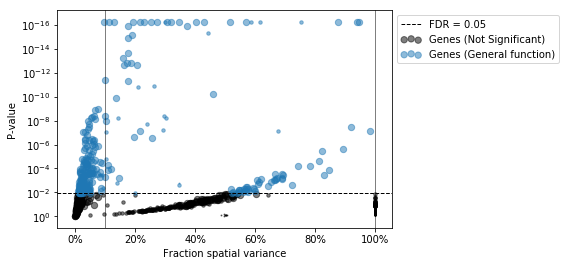

In [11]:
SpatialDE.plot.FSV_sig(results)
plt.axvline(0.1, lw=0.5, c='k')
plt.axvline(1.0, lw=0.5, c='k')

In [12]:
results.query('qval < 0.05').query('0.1 < FSV')['l'].value_counts()

0.000061       44
3289.258805    38
355.351618     19
Name: l, dtype: int64

In [13]:
results \
    .query('qval < 0.05') \
    .query('0.1 < FSV') \
    .sort_values(['pval', 'FSV'], ascending=[True, False]) \
    .head()[['g', 'FSV', 'l', 'pval']]

,g,FSV,l,pval
918,Ptgds,0.945706,3289.258805,5.551115e-17
812,Hpcal4,0.939477,3289.258805,5.551115e-17
784,Gfap,0.874266,3289.258805,5.551115e-17
871,Nrgn,0.750860,3289.258805,5.551115e-17
1005,Trf,0.616500,3289.258805,5.551115e-17


In [14]:
g = 'Slc17a7'

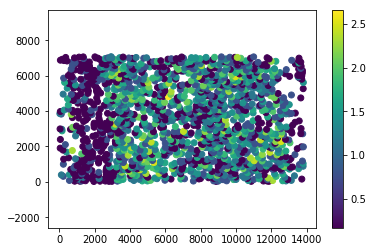

In [15]:
figsize(6, 4)
plt.axes().set_aspect('equal', 'datalim');
plt.scatter(adata.obs.x, adata.obs.y, c=adata[:, g].layers['stabilized']);
plt.colorbar();

In [16]:
sres = results.query('qval < 0.05').query('0.1 < FSV').copy()
sres.shape

(101, 18)

In [17]:
def plot_the_results_helper():
    figsize(12, 8)

    K_hat = len(histology_results.pattern.unique())
    X = adata.obs[['x', 'y']].values
    for i, Ci in enumerate(histology_results.sort_values('pattern').pattern.unique()):
        C = patterns[Ci]
        plt.subplot(2, K_hat / 2, i + 1)
        plt.scatter(X[:,0], -X[:,1], c=C, s=20)

        plt.title('Pattern {} - {} genes'.format(Ci, histology_results.query('pattern == @Ci').shape[0] ))

        xlab = '\n'.join(histology_results.query('pattern == @Ci').sort_values('membership')['g'].tolist()[:7])
        if len(xlab.split()) == 7:
             xlab += '\n...'

        plt.xlabel(xlab)

        # These numbers are pretty much guessed by comparing this plot to Figure 5D in the paper
        for lx in [1000, 3000, 5000, 7000, 10000, 13000]:
            plt.vlines(lx, 500, 1500)

        for tx, tt in zip([0, 2000, 4000, 6000, 8500, 11500, 14000],
                          ['HPC', 'cc', 'L6', 'L5', 'L4', 'L2/3', 'L1']):
            plt.annotate(tt, (tx, 1000), ha='center', va='center')

        plt.hlines(-7500, 12000, 13000)
        plt.plot(12500, -9000)
        plt.annotate('100 µm', (12500, -8500), ha='center')

        plt.xticks([])
        plt.yticks([])

        ax = plt.gca()
        [sp.set_visible(False) for sp in ax.spines.values()]

    plt.tight_layout()

In [18]:
from SpatialDE.anndata import automatic_expression_histology

In [19]:
histology_results, patterns = \
automatic_expression_histology(adata, sres, C=8, l=1000.0,
                               coord_columns=['x', 'y'],
                               layer='residual',
                               verbosity=1)

Performing Automatic Expression Histology
iter 0, ELBO: -8.63e+11
iter 1, ELBO: -4.27e+11, delta_ELBO: 4.36e+11
iter 2, ELBO: -4.27e+11, delta_ELBO: 2.15e+04
iter 3, ELBO: -4.27e+11, delta_ELBO: 3.12e+03
iter 4, ELBO: -4.27e+11, delta_ELBO: 2.03e+01
iter 5, ELBO: -4.27e+11, delta_ELBO: 7.87e+01
iter 6, ELBO: -4.27e+11, delta_ELBO: 1.77e+02
iter 7, ELBO: -4.27e+11, delta_ELBO: 6.99e+01
iter 8, ELBO: -4.27e+11, delta_ELBO: 1.89e+01
iter 9, ELBO: -4.27e+11, delta_ELBO: 3.76e+01
iter 10, ELBO: -4.27e+11, delta_ELBO: 3.63e+00
iter 11, ELBO: -4.27e+11, delta_ELBO: 2.56e-03
Converged on iter 11


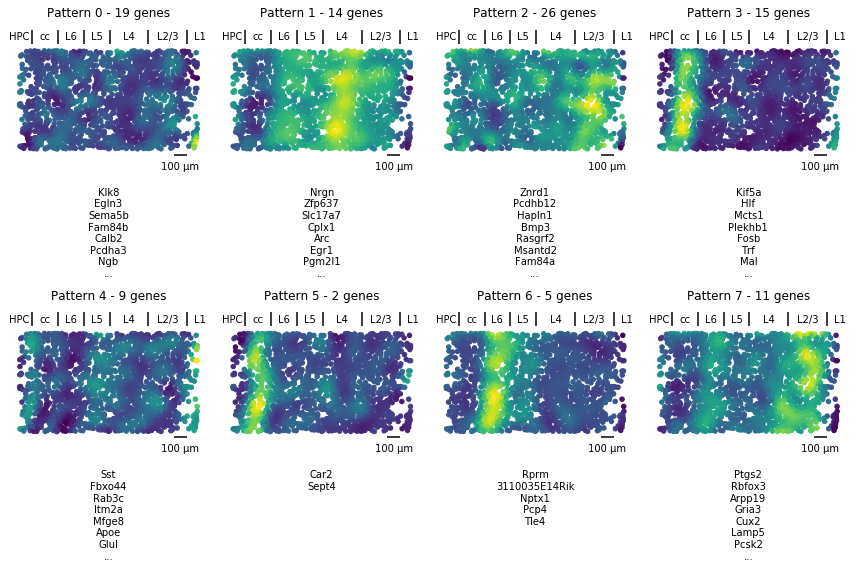

In [20]:
plot_the_results_helper()
plt.savefig('starmap_aeh_results.pdf')

Also print out all genes assigned to the different patterns

In [21]:
for i in histology_results.sort_values('pattern').pattern.unique():
    
    print('Pattern {}'.format(i))
    print(', '.join(histology_results.query('pattern == @i').sort_values('membership')['g'].tolist()))
    print()

Pattern 0
Klk8, Egln3, Sema5b, Fam84b, Calb2, Pcdha3, Ngb, Rnh1, Tmeff1, F3, Sstr4, Mia, Lypd6b, Sgk1, Ephx2, Hs3st4, Pla2g4a, Ppa2, Slc7a3

Pattern 1
Nrgn, Zfp637, Slc17a7, Cplx1, Arc, Egr1, Pgm2l1, Tsnax, Camk2n1, Nrep, Nrsn1, Scg2, Whrn, Zmat4

Pattern 2
Znrd1, Pcdhb12, Hapln1, Bmp3, Rasgrf2, Msantd2, Fam84a, Kctd6, Chrnb3, Nrip3, Cacng4, Cck, Naa38, Lipg, Scd2, Plcxd2, Thsd7a, Kit, Neurod1, Pcdhb11, Aif1, Mei1, Ythdf3, Stmn4, Htr3a, Tmem215

Pattern 3
Kif5a, Hlf, Mcts1, Plekhb1, Fosb, Trf, Mal, Plp1, Gatm, Apod, Mbp, Mobp, Bcl6, Gfap, Ptgds

Pattern 4
Sst, Fbxo44, Rab3c, Itm2a, Mfge8, Apoe, Glul, Mt1, Sparcl1

Pattern 5
Car2, Sept4

Pattern 6
Rprm, 3110035E14Rik, Nptx1, Pcp4, Tle4

Pattern 7
Ptgs2, Rbfox3, Arpp19, Gria3, Cux2, Lamp5, Pcsk2, Cpne5, Enc1, Hpcal4, St3gal5

